# Data import and pre-processing

In [1]:
#import libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir('C:\\Users\\rohan\\Documents\\Analytics\\Data')

In [2]:
#import data
data = pd.read_csv('breast-cancer-wisconsin.csv',header=None)

#set column names
data.columns = ['Sample Code Number','Clump Thickness','Uniformity of Cell Size',
                                                        'Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size',
                                                        'Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']

In [4]:
#view top rows
data.head(10)

,Sample Code Number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [5]:
#Data cleaning
data = data.drop(['Sample Code Number'],axis=1) #Drop 1st column
data = data[data['Bare Nuclei'] != '?'] #Remove rows with missing data
data['Class'] = np.where(data['Class'] ==2,0,1) #Change the Class representation
data.head() #View top 10 rows

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [6]:
#Distribution of Class
data['Class'].value_counts()

0    444
1    239
Name: Class, dtype: int64

In [7]:
#Split data into attributes and class
X = data.drop(['Class'],axis=1)
y = data['Class']

In [8]:
#perform training and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 1. Dummy Classifier

In [158]:
#Dummy Classifier
from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy= 'most_frequent').fit(X_train,y_train)
y_pred = clf.predict(X_test)

#Distribution of y test
print('y actual : \n' +  str(y_test.value_counts()))

#Distribution of y predicted
print('y predicted : \n' + str(pd.Series(y_pred).value_counts()))

# Model Evaluation metrics 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

#Dummy Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

y actual : 
0    103
1     68
Name: Class, dtype: int64
y predicted : 
0    171
dtype: int64
Accuracy Score : 0.6023391812865497
Precision Score : 0.0
Recall Score : 0.0
F1 Score : 0.0
Confusion Matrix : 
[[103   0]
 [ 68   0]]


# 2. Logistic Regression

In [159]:
#Logistic regression
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train,y_train)
y_pred = clf.predict(X_test)

# Model Evaluation metrics 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

#Dummy Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 0.9473684210526315
Precision Score : 0.9836065573770492
Recall Score : 0.8823529411764706
F1 Score : 0.9302325581395349
Confusion Matrix : 
[[102   1]
 [  8  60]]


# 3. Logistic Regression + Grid Search

In [161]:
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'recall')
grid_clf_acc.fit(X_train, y_train)

print(grid_clf_acc.best_estimator_)

y_pred_acc = grid_clf_acc.predict(X_test)

# Model Evaluation metrics 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))

#Dummy Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred_acc)))

LogisticRegression(C=0.009, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
Accuracy Score : 0.9122807017543859
Precision Score : 0.8732394366197183
Recall Score : 0.9117647058823529
F1 Score : 0.8920863309352517
Confusion Matrix : 
[[94  9]
 [ 6 62]]


## Function for confusion matrix plot

In [162]:
#Function to plot intuitive confusion matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [163]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_acc)
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[94  9]
 [ 6 62]]


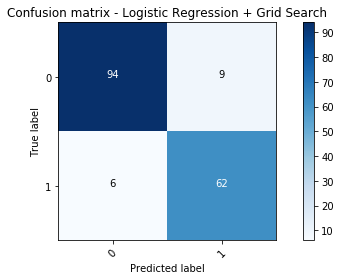

In [164]:
# Plot non-normalized confusion matrix
plt.figure()
class_names = [0,1]
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix - Logistic Regression + Grid Search')
a = plt.gcf()
a.set_size_inches(8,4)
plt.show()